In [119]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

**InvoiceNo**: Número da fatura. Nominal. Um número inteiro de 6 dígitos atribuído de forma única a cada transação. Se esse código começar com a letra 'c', indica um cancelamento.

**StockCode**: Código do produto (item). Nominal. Um número inteiro de 5 dígitos atribuído de forma única a cada produto distinto.

**Description**: Nome do produto (item). Nominal.

**Quantity**: As quantidades de cada produto (item) por transação. Numérico.

**InvoiceDate**: Data e hora da fatura. Numérico. O dia e a hora em que a transação foi gerada.

**UnitPrice**: Preço unitário. Numérico. Preço do produto por unidade em libras esterlinas (£).

**CustomerID**: Número do cliente. Nominal. Um número inteiro de 5 dígitos atribuído de forma única a cada cliente.

**Country**: Nome do país. Nominal. O nome do país onde o cliente reside.

In [326]:
df = pd.read_excel('trabalho001_v2/data/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [121]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [123]:
df['Invoice'] = df['Invoice'].astype(str)
df['Customer ID'] = df['Customer ID'].astype(str)

In [126]:
# Elimina duplicatas na base de dados, de forma que cada produto ocorra apenas 1 única vez em cada fatura (As quantidades de vendas são somadas)
df_tratado = df.groupby(['Invoice', 'StockCode'])['Quantity'].sum().reset_index()
df_tratado

,Invoice,StockCode,Quantity
0,536365,21730,6
1,536365,22752,2
2,536365,71053,6
3,536365,84029E,6
4,536365,84029G,6
...,...,...,...
531221,C581490,23144,-11
531222,C581499,M,-1
531223,C581568,21258,-5
531224,C581569,20979,-5


In [127]:
# Verifica se há duplicidades de produtos em uma mesma fatura
df_tratado[df_tratado.duplicated(subset=['Invoice', 'StockCode'], keep=False)]

,Invoice,StockCode,Quantity


#### Quais são os 5 produtos com maior representatividade de venda? A representatividade é dada pela quantidade de faturas com pelo menos uma venda do produto dividida pela quantidade total de faturas.

In [42]:
# Obtém a quantidade total de faturas para cada produto
freq_invoice = df_tratado['StockCode'].value_counts()
freq_invoice

StockCode
85123A    2246
22423     2172
85099B    2135
47566     1706
20725     1608
          ... 
84251J       1
40018F       1
62095B       1
72814        1
84596g       1
Name: count, Length: 4070, dtype: int64

In [43]:
# Selecionar as linhas onde 'Quantity' é maior ou igual a 1
resultado = df_tratado[df_tratado['Quantity'] >= 1][['Invoice', 'StockCode', 'Quantity']]
resultado

,Invoice,StockCode,Quantity
0,536365,21730,6
1,536365,22752,2
2,536365,71053,6
3,536365,84029E,6
4,536365,84029G,6
...,...,...,...
522082,581587,23256,4
522083,581587,POST,1
522084,A563185,B,1
522085,A563186,B,1


In [44]:
# Obtém a quantidade de faturas com pelo menos 1 venda do produto
qtd_faturas = resultado['StockCode'].value_counts()
qtd_faturas

StockCode
85123A    2203
85099B    2092
22423     1989
47566     1686
20725     1565
          ... 
47579        1
84569C       1
79323B       1
84968f       1
20950        1
Name: count, Length: 3941, dtype: int64

In [45]:
representatividade = qtd_faturas / freq_invoice
representatividade

StockCode
10002           0.986301
10080           1.000000
10120           1.000000
10125           1.000000
10133           0.989899
                  ...   
gift_0001_20    1.000000
gift_0001_30    1.000000
gift_0001_40    1.000000
gift_0001_50    1.000000
m               1.000000
Name: count, Length: 4070, dtype: float64

In [46]:
# Obtém os 5 produtos com maior representatividade de venda
five_products = representatividade.nlargest(5)
resultado_juncao = df.merge(five_products, left_on='StockCode', right_on='StockCode', how='inner')
resultado_final = resultado_juncao.drop_duplicates(subset='StockCode', keep='first')
resultado_final[['Invoice', 'StockCode', 'Description']]

,Invoice,StockCode,Description
0,536464,10125,MINI FUNKY DESIGN TAPES
94,536863,10120,DOGGY RUBBER
124,537140,16011,ANIMAL STICKERS
171,545060,10080,GROOVY CACTUS INFLATABLE
195,547669,15030,FAN BLACK FRAME


#### Considerando somente o período de 2010-2011 (e que estamos no dia 23/12/2011). Descreva o comportamento dos nossos clientes através da distribuição da sua recência (vide referência).

Recência é uma métrica que considera o tempo passado desde a última compra feita por um cliente

In [100]:
hoje = datetime.strptime('23/12/2011', '%d/%m/%Y')

Como existem ocorrências e várias compras no mesmo dia, a recência será considerada apenas a última interação do cliente em um determinado dia.

In [101]:
df_tratado_2 = df[~df['Invoice'].astype(str).str.startswith('C')]
df_tratado_2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [94]:
df_client = df_tratado_2.groupby(['Customer ID', 'Invoice', 'InvoiceDate'])['Quantity'].sum().reset_index()
df_client

,Customer ID,Invoice,InvoiceDate,Quantity
0,12346.0,541431,2011-01-18 10:01:00,74215
1,12347.0,537626,2010-12-07 14:57:00,319
2,12347.0,542237,2011-01-26 14:30:00,315
3,12347.0,549222,2011-04-07 10:43:00,483
4,12347.0,556201,2011-06-09 13:01:00,196
...,...,...,...,...
22101,nan,581497,2011-12-09 10:23:00,654
22102,nan,581498,2011-12-09 10:26:00,732
22103,nan,A563185,2011-08-12 14:50:00,1
22104,nan,A563186,2011-08-12 14:51:00,1


In [102]:
duplicates = df_client[df_client.duplicated(subset=['Customer ID', 'InvoiceDate'], keep=False)]
duplicates

,Customer ID,Invoice,InvoiceDate,Quantity
164,12415.0,556917,2011-06-15 13:37:00,15049
165,12415.0,556918,2011-06-15 13:37:00,192
204,12424.0,558536,2011-06-30 12:06:00,532
205,12424.0,558537,2011-06-30 12:06:00,208
676,12569.0,572894,2011-10-26 14:39:00,5
...,...,...,...,...
22083,nan,581209,2011-12-07 18:35:00,6
22084,nan,581210,2011-12-07 18:36:00,-26
22085,nan,581211,2011-12-07 18:36:00,14
22086,nan,581212,2011-12-07 18:38:00,-1050


In [103]:
# Remover duplicatas de clientes que fizeram várias compras no mesmo dia
df_sem_duplicatas = df_client.drop_duplicates(subset=['Customer ID', 'InvoiceDate'], keep='first')
df_sem_duplicatas

,Customer ID,Invoice,InvoiceDate,Quantity
0,12346.0,541431,2011-01-18 10:01:00,74215
1,12347.0,537626,2010-12-07 14:57:00,319
2,12347.0,542237,2011-01-26 14:30:00,315
3,12347.0,549222,2011-04-07 10:43:00,483
4,12347.0,556201,2011-06-09 13:01:00,196
...,...,...,...,...
22101,nan,581497,2011-12-09 10:23:00,654
22102,nan,581498,2011-12-09 10:26:00,732
22103,nan,A563185,2011-08-12 14:50:00,1
22104,nan,A563186,2011-08-12 14:51:00,1


In [104]:
df_sem_duplicatas[df_sem_duplicatas.duplicated(subset=['Customer ID', 'InvoiceDate'], keep=False)]

,Customer ID,Invoice,InvoiceDate,Quantity


In [108]:
df_sem_duplicatas = df_sem_duplicatas.groupby('Customer ID')['InvoiceDate'].max().reset_index()
df_sem_duplicatas

,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4335,18281.0,2011-06-12 10:53:00
4336,18282.0,2011-12-02 11:43:00
4337,18283.0,2011-12-06 12:02:00
4338,18287.0,2011-10-28 09:29:00


In [109]:
df_sem_duplicatas['Recency'] = (hoje - df_sem_duplicatas['InvoiceDate']).dt.days
df_sem_duplicatas

,Customer ID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,338
1,12347.0,2011-12-07 15:52:00,15
2,12348.0,2011-09-25 13:13:00,88
3,12349.0,2011-11-21 09:51:00,31
4,12350.0,2011-02-02 16:01:00,323
...,...,...,...
4335,18281.0,2011-06-12 10:53:00,193
4336,18282.0,2011-12-02 11:43:00,20
4337,18283.0,2011-12-06 12:02:00,16
4338,18287.0,2011-10-28 09:29:00,55


In [132]:
numbers = []

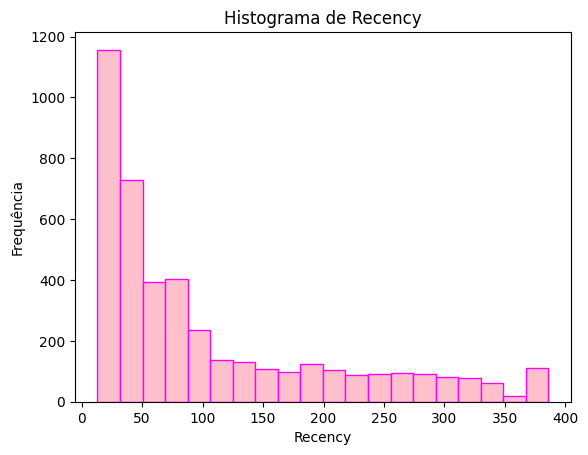

In [134]:
hist, bins, _  = plt.hist(df_sem_duplicatas['Recency'], bins=20, color='pink', edgecolor='magenta')
plt.xlabel('Recency')
plt.ylabel('Frequência')
plt.title('Histograma de Recency')
# for i in range(len(hist)):
#     plt.text(bins[i], hist[i], f'{int(bins[i])}-{int(bins[i+1])} ({int(hist[i])})', ha='center', va='bottom')
#     numbers.append((int(bins[i]), int(bins[i+1]), int(hist[i])))
plt.show()

In [135]:
numbers

[(13, 31, 1157),
 (31, 50, 728),
 (50, 68, 394),
 (68, 87, 404),
 (87, 106, 237),
 (106, 124, 138),
 (124, 143, 132),
 (143, 162, 109),
 (162, 180, 97),
 (180, 199, 125),
 (199, 218, 104),
 (218, 236, 89),
 (236, 255, 92),
 (255, 274, 94),
 (274, 292, 90),
 (292, 311, 80),
 (311, 330, 77),
 (330, 348, 63),
 (348, 367, 19),
 (367, 386, 111)]

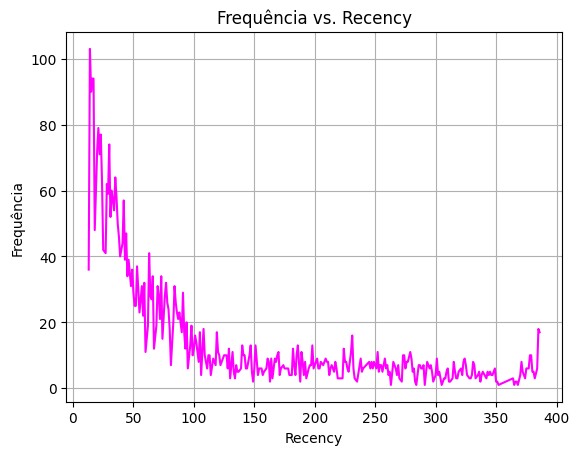

In [115]:
frequencia = df_sem_duplicatas['Recency'].value_counts().sort_index()

# Crie um gráfico de linha
plt.plot(frequencia.index, frequencia.values, color='magenta')
plt.xlabel('Recency')
plt.ylabel('Frequência')
plt.title('Frequência vs. Recency')
plt.grid(True)

plt.show()

Observa-se que, pelo histograma, a maioria dos clientes possuem recência de 13 a 31 dias.
A recência se concentra nos 50 primeiros dias, tendendo a aumentar a partir daí e sendo cada vez menos frequente.
Observando o gráfico de linhas, é possível visualizar uma tendência de aumento da recência, seguido com uma frequência menor de clientes.
Contudo, com base nas observações, é possível concluir que os clientes deixam de comprar novamente a partir do 50° dia, diminuindo também a frequência de clientes.

#### Considerando faturamento crie uma curva ABC e responda: Qual é a média de faturamento dos itens da classe A?

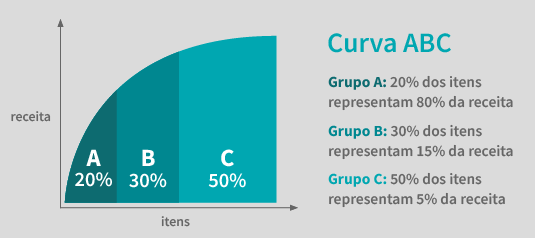

Faturamento = Quantidade do produto vendido * preço unitário

In [219]:
data_tratado_3 = df[~df['Invoice'].astype(str).str.startswith('C')]
data_tratado_3

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [220]:
df_tratado_3 = data_tratado_3.groupby(['Invoice', 'StockCode', 'Price'])['Quantity'].sum().reset_index()
df_tratado_3

,Invoice,StockCode,Price,Quantity
0,536365,21730,4.25,6
1,536365,22752,7.65,2
2,536365,71053,3.39,6
3,536365,84029E,3.39,6
4,536365,84029G,3.39,6
...,...,...,...,...
522579,581587,23256,4.15,4
522580,581587,POST,18.00,1
522581,A563185,B,11062.06,1
522582,A563186,B,-11062.06,1


In [221]:
# Presença de produtos na mesma fatura com preços diferentes
df_tratado_3[df_tratado_3.duplicated(subset=['Invoice', 'StockCode'], keep=False)]

,Invoice,StockCode,Price,Quantity
1424,536544,21218,3.75,2
1425,536544,21218,8.47,1
1705,536544,22844,8.50,2
1706,536544,22844,16.98,1
1709,536544,22862,4.25,2
...,...,...,...,...
521964,581497,21481,10.29,1
521978,581497,22356,2.46,25
521979,581497,22356,5.63,1
521999,581497,23206,4.96,3


In [222]:
df_tratado_3['Faturamento'] = df_tratado_3['Price'] * df_tratado_3['Quantity']
df_tratado_3

,Invoice,StockCode,Price,Quantity,Faturamento
0,536365,21730,4.25,6,25.50
1,536365,22752,7.65,2,15.30
2,536365,71053,3.39,6,20.34
3,536365,84029E,3.39,6,20.34
4,536365,84029G,3.39,6,20.34
...,...,...,...,...,...
522579,581587,23256,4.15,4,16.60
522580,581587,POST,18.00,1,18.00
522581,A563185,B,11062.06,1,11062.06
522582,A563186,B,-11062.06,1,-11062.06


In [223]:
df_tratado_3 = df_tratado_3.loc[:,['StockCode', 'Faturamento']].groupby('StockCode').sum().sort_values(by='Faturamento', ascending=False).reset_index()
df_tratado_3

,StockCode,Faturamento
0,DOT,206248.77
1,22423,174484.74
2,23843,168469.60
3,85123A,104518.80
4,47566,99504.33
...,...,...
4054,84971L,0.00
4055,85110,0.00
4056,21645,0.00
4057,47591A,0.00


In [224]:
df_tratado_3['Porcentagem Acumulada'] = (df_tratado_3['Faturamento'].cumsum() / df_tratado_3['Faturamento'].sum()) * 100
df_tratado_3

,StockCode,Faturamento,Porcentagem Acumulada
0,DOT,206248.77,1.937595
1,22423,174484.74,3.576783
2,23843,168469.60,5.159463
3,85123A,104518.80,6.141360
4,47566,99504.33,7.076149
...,...,...,...
4054,84971L,0.00,100.103922
4055,85110,0.00,100.103922
4056,21645,0.00,100.103922
4057,47591A,0.00,100.103922


In [225]:
df_tratado_3['Curva ABC'] = pd.cut(df_tratado_3['Porcentagem Acumulada'], bins=[0, 70, 90, 100], labels=['A', 'B', 'C'])
df_tratado_3

,StockCode,Faturamento,Porcentagem Acumulada,Curva ABC
0,DOT,206248.77,1.937595,A
1,22423,174484.74,3.576783,A
2,23843,168469.60,5.159463,A
3,85123A,104518.80,6.141360,A
4,47566,99504.33,7.076149,A
...,...,...,...,...
4054,84971L,0.00,100.103922,NaN
4055,85110,0.00,100.103922,NaN
4056,21645,0.00,100.103922,NaN
4057,47591A,0.00,100.103922,NaN


In [226]:
labels = ['A', 'B', 'C']

In [227]:
categoria_count = df_tratado_3['Curva ABC'].value_counts().reindex(labels).fillna(0)
categoria_count

Curva ABC
A     522
B     784
C    2029
Name: count, dtype: int64

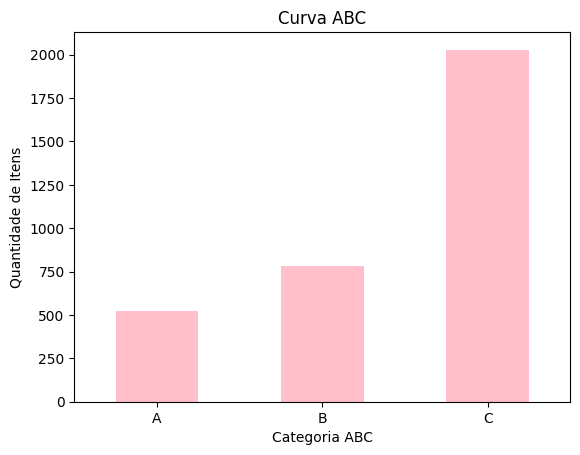

In [228]:
categoria_count.plot(kind='bar', color='pink')
plt.xlabel('Categoria ABC')
plt.ylabel('Quantidade de Itens')
plt.title('Curva ABC')
plt.xticks(rotation=0)

plt.show()

In [229]:
df_tratado_3 = df_tratado_3.sort_values(by='Porcentagem Acumulada')
df_tratado_3

,StockCode,Faturamento,Porcentagem Acumulada,Curva ABC
0,DOT,206248.77,1.937595,A
1,22423,174484.74,3.576783,A
2,23843,168469.60,5.159463,A
3,85123A,104518.80,6.141360,A
4,47566,99504.33,7.076149,A
...,...,...,...,...
3966,79323W,0.00,100.103922,NaN
3967,21825,0.00,100.103922,NaN
3968,79323LP,0.00,100.103922,NaN
3962,72140F,0.00,100.103922,NaN


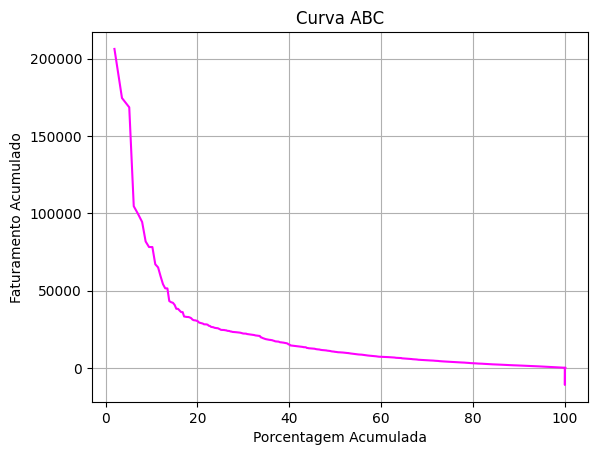

In [234]:
plt.plot(df_tratado_3['Porcentagem Acumulada'], df_tratado_3['Faturamento'], linestyle='-', color='magenta')

plt.xlabel('Porcentagem Acumulada')
plt.ylabel('Faturamento Acumulado')
plt.title('Curva ABC')
plt.grid(True)

plt.show()

In [231]:
itens_classe_A = df_tratado_3[df_tratado_3['Curva ABC'] == 'A']
itens_classe_A

,StockCode,Faturamento,Porcentagem Acumulada,Curva ABC
0,DOT,206248.77,1.937595,A
1,22423,174484.74,3.576783,A
2,23843,168469.60,5.159463,A
3,85123A,104518.80,6.141360,A
4,47566,99504.33,7.076149,A
...,...,...,...,...
517,23570,4944.37,69.786951,A
518,84212,4934.87,69.833311,A
519,22110,4914.69,69.879482,A
520,21937,4901.80,69.925532,A


In [232]:
media_faturamento = itens_classe_A['Faturamento'].mean()
media_faturamento

14268.535804597701

#### Qual o ticket médio dos clientes únicos (clientes com somente uma compra)?

In [273]:
df_tratado_4 = df[~df['Invoice'].astype(str).str.startswith('C')]

In [274]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [275]:
df_tratado_4 = df_tratado_4.groupby(['Invoice', 'StockCode', 'Price', 'InvoiceDate', 'Customer ID'])['Quantity'].sum().reset_index()
df_tratado_4

,Invoice,StockCode,Price,InvoiceDate,Customer ID,Quantity
0,536365,21730,4.25,2010-12-01 08:26:00,17850.0,6
1,536365,22752,7.65,2010-12-01 08:26:00,17850.0,2
2,536365,71053,3.39,2010-12-01 08:26:00,17850.0,6
3,536365,84029E,3.39,2010-12-01 08:26:00,17850.0,6
4,536365,84029G,3.39,2010-12-01 08:26:00,17850.0,6
...,...,...,...,...,...,...
522584,581587,23256,4.15,2011-12-09 12:50:00,12680.0,4
522585,581587,POST,18.00,2011-12-09 12:50:00,12680.0,1
522586,A563185,B,11062.06,2011-08-12 14:50:00,nan,1
522587,A563186,B,-11062.06,2011-08-12 14:51:00,nan,1


In [276]:
df_tratado_4['Faturamento'] = df_tratado_4['Price'] * df_tratado_4['Quantity']
df_tratado_4

,Invoice,StockCode,Price,InvoiceDate,Customer ID,Quantity,Faturamento
0,536365,21730,4.25,2010-12-01 08:26:00,17850.0,6,25.50
1,536365,22752,7.65,2010-12-01 08:26:00,17850.0,2,15.30
2,536365,71053,3.39,2010-12-01 08:26:00,17850.0,6,20.34
3,536365,84029E,3.39,2010-12-01 08:26:00,17850.0,6,20.34
4,536365,84029G,3.39,2010-12-01 08:26:00,17850.0,6,20.34
...,...,...,...,...,...,...,...
522584,581587,23256,4.15,2011-12-09 12:50:00,12680.0,4,16.60
522585,581587,POST,18.00,2011-12-09 12:50:00,12680.0,1,18.00
522586,A563185,B,11062.06,2011-08-12 14:50:00,nan,1,11062.06
522587,A563186,B,-11062.06,2011-08-12 14:51:00,nan,1,-11062.06


In [277]:
df_tratado_4 = df_tratado_4.groupby(['Customer ID', 'InvoiceDate'])['Faturamento'].sum().reset_index()
df_tratado_4

,Customer ID,InvoiceDate,Faturamento
0,12346.0,2011-01-18 10:01:00,77183.60
1,12347.0,2010-12-07 14:57:00,711.79
2,12347.0,2011-01-26 14:30:00,475.39
3,12347.0,2011-04-07 10:43:00,636.25
4,12347.0,2011-06-09 13:01:00,382.52
...,...,...,...
21421,nan,2011-12-08 16:14:00,3.35
21422,nan,2011-12-08 16:30:00,6637.59
21423,nan,2011-12-09 10:03:00,7689.23
21424,nan,2011-12-09 10:23:00,3217.20


In [278]:
freq_clientes = df_tratado_4['Customer ID'].value_counts()
freq_clientes

Customer ID
nan        2982
12748.0     211
14911.0     201
17841.0     124
14606.0      95
           ... 
15308.0       1
15307.0       1
15303.0       1
15292.0       1
15300.0       1
Name: count, Length: 4340, dtype: int64

In [281]:
valores_unicos = ~df_tratado_4['Customer ID'].duplicated(keep=False)
valores_unicos

0         True
1        False
2        False
3        False
4        False
         ...  
21421    False
21422    False
21423    False
21424    False
21425    False
Name: Customer ID, Length: 21426, dtype: bool

In [282]:
df_filtrado = df_tratado_4[valores_unicos]
df_filtrado

,Customer ID,InvoiceDate,Faturamento
0,12346.0,2011-01-18 10:01:00,77183.60
12,12349.0,2011-11-21 09:51:00,1757.55
13,12350.0,2011-02-02 16:01:00,334.40
22,12353.0,2011-05-19 17:47:00,89.00
23,12354.0,2011-04-21 13:11:00,1079.40
...,...,...,...
18418,18276.0,2011-10-27 10:54:00,335.86
18419,18277.0,2011-10-12 15:22:00,110.38
18420,18278.0,2011-09-27 11:58:00,173.90
18421,18280.0,2011-03-07 09:52:00,180.60


In [288]:
ticket_medio = df_filtrado['Faturamento'].sum() / df_filtrado.shape[0]
ticket_medio

414.1993054812834

#### Em cada mês do ano de 2011 (até novembro), qual foi a hora com menor quantidade de vendas? Quais foram as 3 horas com a menor?

In [367]:
df_tratado_5 = df[~df['Invoice'].astype(str).str.startswith('C')]

In [338]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [368]:
df_tratado_5 = df_tratado_5.groupby(['InvoiceDate', 'Invoice'])['Quantity'].sum().reset_index()
df_tratado_5

,InvoiceDate,Invoice,Quantity
0,2010-12-01 08:26:00,536365,40
1,2010-12-01 08:28:00,536366,12
2,2010-12-01 08:34:00,536367,83
3,2010-12-01 08:34:00,536368,15
4,2010-12-01 08:35:00,536369,3
...,...,...,...
22101,2011-12-09 12:23:00,581583,76
22102,2011-12-09 12:25:00,581584,120
22103,2011-12-09 12:31:00,581585,278
22104,2011-12-09 12:49:00,581586,66


In [369]:
df_2011 = df_tratado_5[df_tratado_5['InvoiceDate'].dt.year == 2011].reset_index()
df_2011

,index,InvoiceDate,Invoice,Quantity
0,1700,2011-01-04 10:00:00,539993,171
1,1701,2011-01-04 10:09:00,539994,-1
2,1702,2011-01-04 10:12:00,539995,-12
3,1703,2011-01-04 10:12:00,539996,-10
4,1704,2011-01-04 10:15:00,539997,5
...,...,...,...,...
20401,22101,2011-12-09 12:23:00,581583,76
20402,22102,2011-12-09 12:25:00,581584,120
20403,22103,2011-12-09 12:31:00,581585,278
20404,22104,2011-12-09 12:49:00,581586,66


In [370]:
df_2011['Month'] = df_2011['InvoiceDate'].dt.month
df_2011['Hour'] = df_2011['InvoiceDate'].dt.hour

In [371]:
df_2011.drop(df_2011[df_2011['Month'] == 12].index, inplace=True)

In [372]:
df_agrupado = df_2011.groupby(['Month', 'Hour'])['Invoice'].size().reset_index().sort_values(by='Month', ascending=True)
df_agrupado

,Month,Hour,Invoice
0,1,7,1
12,1,19,2
11,1,18,7
10,1,17,40
8,1,15,143
...,...,...,...
137,11,9,214
136,11,8,117
135,11,7,3
140,11,12,482


In [373]:
hora_menor_vendas = df_agrupado.groupby('Month')['Invoice'].idxmin()
hora_menor_vendas

Month
1       0
2      13
3      39
4      40
5      66
6      80
7      93
8      94
9     108
10    134
11    148
Name: Invoice, dtype: int64

In [374]:
df_agrupado.loc[hora_menor_vendas]

,Month,Hour,Invoice
0,1,7,1
13,2,7,2
39,3,20,2
40,4,7,3
66,5,20,3
80,6,20,2
93,7,20,2
94,8,6,1
108,9,7,2
134,10,20,3


In [375]:
df_2011_geral = df_tratado_5[df_tratado_5['InvoiceDate'].dt.year == 2011].reset_index()
df_2011_geral

,index,InvoiceDate,Invoice,Quantity
0,1700,2011-01-04 10:00:00,539993,171
1,1701,2011-01-04 10:09:00,539994,-1
2,1702,2011-01-04 10:12:00,539995,-12
3,1703,2011-01-04 10:12:00,539996,-10
4,1704,2011-01-04 10:15:00,539997,5
...,...,...,...,...
20401,22101,2011-12-09 12:23:00,581583,76
20402,22102,2011-12-09 12:25:00,581584,120
20403,22103,2011-12-09 12:31:00,581585,278
20404,22104,2011-12-09 12:49:00,581586,66


In [376]:
df_2011_geral['Hour'] = df_2011_geral['InvoiceDate'].dt.hour
df_2011_geral

,index,InvoiceDate,Invoice,Quantity,Hour
0,1700,2011-01-04 10:00:00,539993,171,10
1,1701,2011-01-04 10:09:00,539994,-1,10
2,1702,2011-01-04 10:12:00,539995,-12,10
3,1703,2011-01-04 10:12:00,539996,-10,10
4,1704,2011-01-04 10:15:00,539997,5,10
...,...,...,...,...,...
20401,22101,2011-12-09 12:23:00,581583,76,12
20402,22102,2011-12-09 12:25:00,581584,120,12
20403,22103,2011-12-09 12:31:00,581585,278,12
20404,22104,2011-12-09 12:49:00,581586,66,12


In [378]:
df_2011_agrupado = df_2011_geral.groupby(['Hour'])['Invoice'].size().reset_index().sort_values(by='Hour', ascending=True)
df_2011_agrupado

,Hour,Invoice
0,6,1
1,7,27
2,8,544
3,9,1477
4,10,2388
5,11,2453
6,12,3224
7,13,2711
8,14,2551
9,15,2399


#### Qual a representatividade financeira das vendas feitas para paises da Europa?

In [420]:
df_tratado_6 = df[~df['Invoice'].astype(str).str.startswith('C')]

In [380]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [381]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [421]:
paises_europeus = ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy', 'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark', 'Poland', 'Israel', 'Greece', 'Malta']
df_tratado_6['Europa'] = df_tratado_6['Country'].isin(paises_europeus)
df_tratado_6

C:\Users\debora.morais\AppData\Local\Temp\ipykernel_25048\2025358405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado_6['Europa'] = df_tratado_6['Country'].isin(paises_europeus)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Europa
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,True
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,True
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,True


In [422]:
df_tratado_6['Europa'].value_counts()

Europa
True     530487
False      2135
Name: count, dtype: int64

In [423]:
df_europa_tratado = df_tratado_6.groupby(['Europa', 'Invoice'])['Quantity'].sum().reset_index()
df_europa_tratado

,Europa,Invoice,Quantity
0,False,537081,442
1,False,537086,168
2,False,537090,12
3,False,537218,196
4,False,537626,319
...,...,...,...
22059,True,581586,66
22060,True,581587,106
22061,True,A563185,1
22062,True,A563186,1


In [424]:
# Verifica se há duplicidades de produtos em uma mesma fatura
df_europa_tratado[df_europa_tratado.duplicated(subset=['Europa', 'Invoice'], keep=False)]

,Europa,Invoice,Quantity


In [427]:
# Obtém a quantidade total de faturas para cada valor bool de europa
freq_invoice = df_europa_tratado['Europa'].value_counts().sum()
freq_invoice

22064

In [410]:
# Selecionar as linhas onde 'Quantity' é maior ou igual a 1
resultado = df_europa_tratado[df_europa_tratado['Quantity'] >= 1][['Europa', 'Invoice', 'Quantity']]
resultado

,Europa,Invoice,Quantity
0,False,537081,442
1,False,537086,168
2,False,537090,12
3,False,537218,196
4,False,537626,319
...,...,...,...
22059,True,581586,66
22060,True,581587,106
22061,True,A563185,1
22062,True,A563186,1


In [428]:
# Obtém a quantidade de faturas com pelo menos 1 venda do produto
qtd_faturas = resultado['Europa'].value_counts()
qtd_faturas

Europa
True     20640
False       88
Name: count, dtype: int64

In [429]:
representatividade = qtd_faturas / freq_invoice
representatividade

Europa
True     0.935460
False    0.003988
Name: count, dtype: float64

#### O país de origem interfere no comportamento de compra dos clientes? Considerando somente recência e frequência.

In [463]:
df_tratado_7 = df[~df['Invoice'].astype(str).str.startswith('C')]

In [432]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [464]:
df_agrupado = df_tratado_7.groupby(['Customer ID', 'InvoiceDate', 'Invoice'])['Quantity'].sum().reset_index()
df_agrupado

,Customer ID,InvoiceDate,Invoice,Quantity
0,12346.0,2011-01-18 10:01:00,541431,74215
1,12347.0,2010-12-07 14:57:00,537626,319
2,12347.0,2011-01-26 14:30:00,542237,315
3,12347.0,2011-04-07 10:43:00,549222,483
4,12347.0,2011-06-09 13:01:00,556201,196
...,...,...,...,...
18561,18283.0,2011-11-30 12:59:00,579673,134
18562,18283.0,2011-12-06 12:02:00,580872,142
18563,18287.0,2011-05-22 10:39:00,554065,488
18564,18287.0,2011-10-12 10:23:00,570715,990


In [465]:
frequency = df_agrupado['Customer ID'].value_counts()
frequency

Customer ID
12748.0    211
14911.0    202
17841.0    124
13089.0     97
14606.0     95
          ... 
13751.0      1
13753.0      1
16227.0      1
16222.0      1
12346.0      1
Name: count, Length: 4339, dtype: int64

In [466]:
df_agrupado['Frequency'] = df_agrupado['Customer ID'].map(df_agrupado['Customer ID'].value_counts())

In [468]:
df_agrupado

,Customer ID,InvoiceDate,Invoice,Quantity,Frequency
0,12346.0,2011-01-18 10:01:00,541431,74215,1
1,12347.0,2010-12-07 14:57:00,537626,319,7
2,12347.0,2011-01-26 14:30:00,542237,315,7
3,12347.0,2011-04-07 10:43:00,549222,483,7
4,12347.0,2011-06-09 13:01:00,556201,196,7
...,...,...,...,...,...
18561,18283.0,2011-11-30 12:59:00,579673,134,16
18562,18283.0,2011-12-06 12:02:00,580872,142,16
18563,18287.0,2011-05-22 10:39:00,554065,488,3
18564,18287.0,2011-10-12 10:23:00,570715,990,3


In [470]:
df_frequency = df_agrupado.merge(df_tratado_7, on=['Customer ID'], how='inner')
df_frequency 

,Customer ID,InvoiceDate_x,Invoice_x,Quantity_x,Frequency,Invoice_y,StockCode,Description,Quantity_y,InvoiceDate_y,Price,Country
0,12346.0,2011-01-18 10:01:00,541431,74215,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom
1,12347.0,2010-12-07 14:57:00,537626,319,7,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland
2,12347.0,2010-12-07 14:57:00,537626,319,7,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland
3,12347.0,2010-12-07 14:57:00,537626,319,7,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland
4,12347.0,2010-12-07 14:57:00,537626,319,7,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland
...,...,...,...,...,...,...,...,...,...,...,...,...
7507305,18287.0,2011-10-28 09:29:00,573167,108,3,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,United Kingdom
7507306,18287.0,2011-10-28 09:29:00,573167,108,3,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,United Kingdom
7507307,18287.0,2011-10-28 09:29:00,573167,108,3,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,United Kingdom
7507308,18287.0,2011-10-28 09:29:00,573167,108,3,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,United Kingdom


In [473]:
frequency_por_pais = df_frequency.groupby('Country')['Frequency'].mean()
frequency_por_pais

Country
Australia                19.137596
Austria                   2.632699
Bahrain                   1.000000
Belgium                   8.229734
Brazil                    1.000000
Canada                    2.923990
Channel Islands           6.713269
Cyprus                    4.016835
Czech Republic            2.000000
Denmark                   2.922696
EIRE                    192.651314
European Community        4.000000
Finland                   8.077925
France                   16.243392
Germany                  17.018677
Greece                    1.550000
Iceland                   7.000000
Israel                    1.473846
Italy                     7.294989
Japan                     5.408350
Lebanon                   1.000000
Lithuania                 4.000000
Malta                     3.568690
Netherlands              73.538804
Norway                    6.202841
Poland                    6.694614
Portugal                  9.403240
RSA                       1.000000
Saudi Arabia

In [474]:
frequency_por_pais = frequency_por_pais.sort_values(ascending=False)

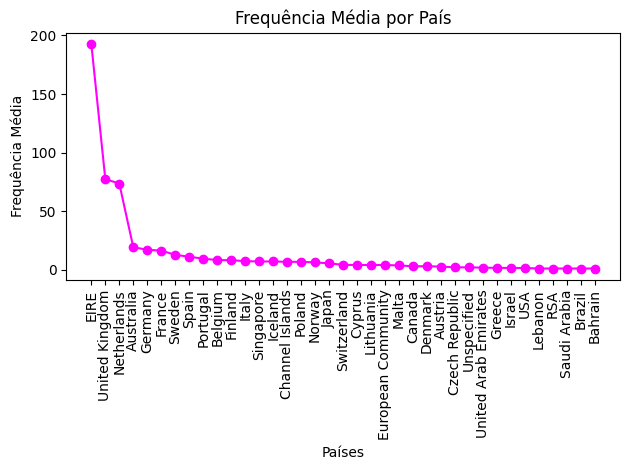

In [475]:
plt.plot(frequency_por_pais.index, frequency_por_pais.values, marker='o', linestyle='-', color='magenta')
plt.xlabel('Países')
plt.ylabel('Frequência Média')
plt.title('Frequência Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [439]:
df_recency = df_sem_duplicatas.merge(df_tratado_2, on=['Customer ID', 'InvoiceDate'], how='inner')
df_recency

,Customer ID,InvoiceDate,Recency,Invoice,StockCode,Description,Quantity,Price,Country
0,12346.0,2011-01-18 10:01:00,338,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,United Kingdom
1,12347.0,2011-12-07 15:52:00,15,581180,23497,CLASSIC CHROME BICYCLE BELL,12,1.45,Iceland
2,12347.0,2011-12-07 15:52:00,15,581180,23552,BICYCLE PUNCTURE REPAIR KIT,6,2.08,Iceland
3,12347.0,2011-12-07 15:52:00,15,581180,21064,BOOM BOX SPEAKER BOYS,24,1.25,Iceland
4,12347.0,2011-12-07 15:52:00,15,581180,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,0.85,Iceland
...,...,...,...,...,...,...,...,...,...
92586,nan,2011-12-09 10:26:00,13,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,United Kingdom
92587,nan,2011-12-09 10:26:00,13,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,United Kingdom
92588,nan,2011-12-09 10:26:00,13,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,United Kingdom
92589,nan,2011-12-09 10:26:00,13,581498,85174,S/4 CACTI CANDLES,1,10.79,United Kingdom


In [441]:
recencia_por_pais = df_recency.groupby('Country')['Recency'].mean()
recencia_por_pais

Country
Australia               113.964286
Austria                 111.103774
Bahrain                 224.647059
Belgium                  86.043977
Brazil                  251.000000
Canada                  224.529412
Channel Islands         176.621212
Cyprus                   68.641304
Czech Republic           76.000000
Denmark                  51.650307
EIRE                     64.324324
European Community      154.000000
Finland                  88.779412
France                   88.047751
Germany                 103.554574
Greece                  189.315789
Iceland                  15.000000
Israel                  130.255000
Italy                   134.677054
Japan                   118.146341
Lebanon                 329.000000
Lithuania               379.000000
Malta                   109.210526
Netherlands             120.620370
Norway                   79.470874
Poland                   84.008475
Portugal                114.022613
RSA                      70.000000
Saudi Arabia

In [442]:
recencia_por_pais = recencia_por_pais.sort_values(ascending=False)

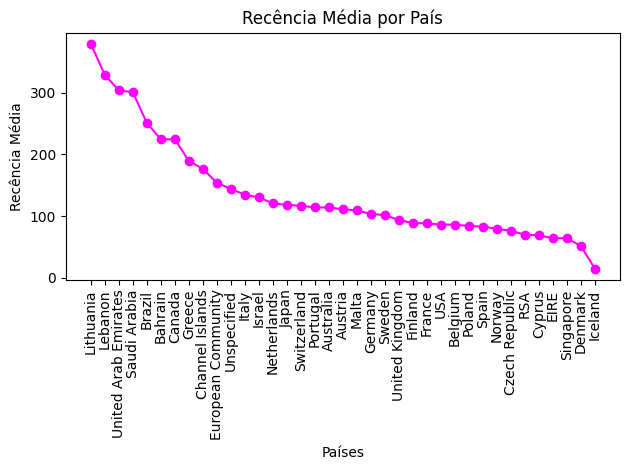

In [445]:
plt.plot(recencia_por_pais.index, recencia_por_pais.values, marker='o', linestyle='-', color='magenta')
plt.xlabel('Países')
plt.ylabel('Recência Média')
plt.title('Recência Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(recencia_por_pais.index, recencia_por_pais.values, marker='o', linestyle='-', color='magenta')
plt.xlabel('Países')
plt.ylabel('Recência Média')
plt.title('Recência Média por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()